# **資料增強** 
由於YOLOv5以上都有內建此功能以及用albumentations庫比較好，這邊簡易拿Casado-García,Ángela等人於Colab公開的[CLoDSA：一種用於增強分類、定位、檢測、語義分割和實例分割任務的工具]工具來修改。

資料來源:
https://github.com/joheras/CLoDSA/blob/master/docs/related.md

論文:
https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2931-1

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content/gdrive/MyDrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/data
%ls

/content/gdrive/MyDrive/data
RAWdata/


## Augmentation techniques

- Vertical, horizontal, and vertical-horizontal flips.
- 180º Rotation.
- Average blurring.
- Raise the hue value. 

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [ ]:
!pip install clodsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA. We also load some libraries to show the results.

In [ ]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in a detection problem

In [ ]:
PROBLEM = "detection"

_The annotation mode_. We use the YOLO format. 

In [ ]:
ANNOTATION_MODE = "yolo"

_The input path_. The input path containing the images. 

In [ ]:
INPUT_PATH = "RAWdata/"

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [ ]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called augmented_images.  

In [ ]:
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "JPEGImages"

Using the above information, we can create our augmentor object. 

In [ ]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

Just for showing the results of applying data augmentation in an object detection problem, we define a function to read the annotations and another one to show them. This funcionality is not necessary when using CLODSA since it is already implemented in there. 

In [ ]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [ ]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])
    

Now, we show the annotation of the image.

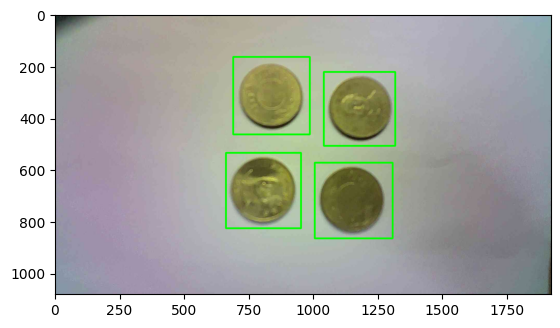

In [ ]:
img,boxes = boxesFromYOLO("/content/gdrive/MyDrive/data/RAWdata/下載 (4).jpg","/content/gdrive/MyDrive/data/RAWdata/下載 (4).txt")
showBoxes(img,boxes)

First of all, we must define a transformer generator.

In [ ]:
transformer = transformerGenerator(PROBLEM)

#### Vertical flip

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

Showing the result of applying the transformation.

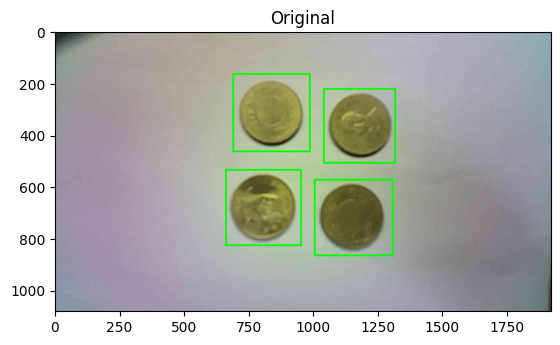

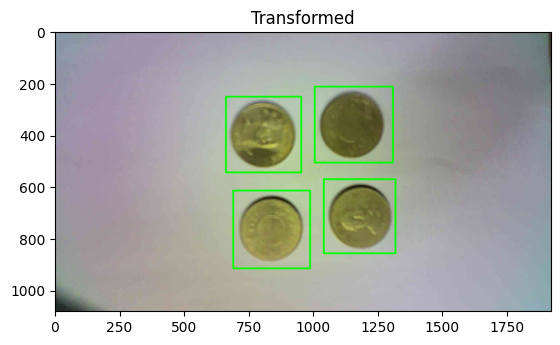

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

#### Horizontal flip

In [ ]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

Showing the result of applying the transformation.

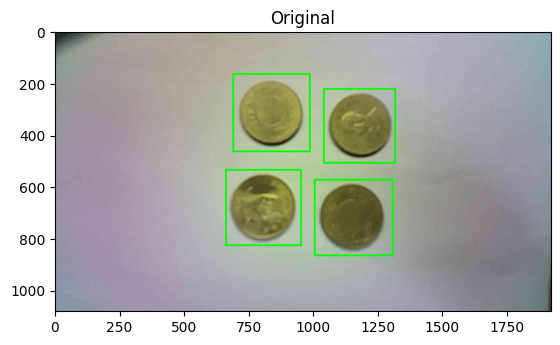

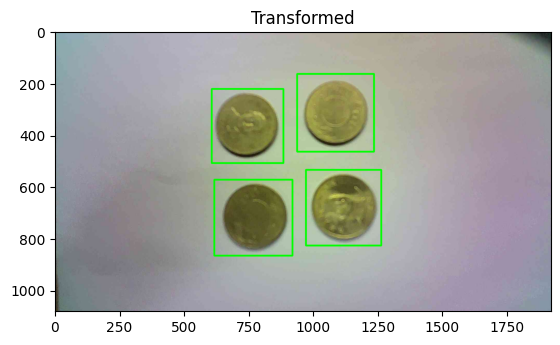

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

#### Horizontal and vertical flip

In [ ]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

Showing the result of applying the transformation.

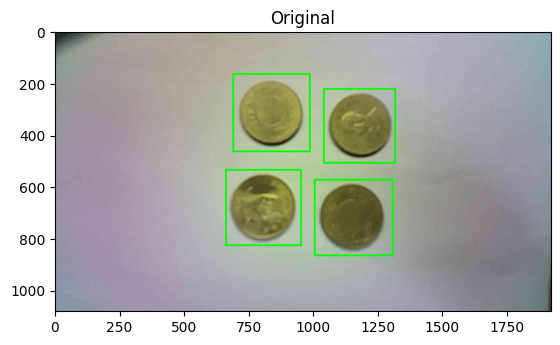

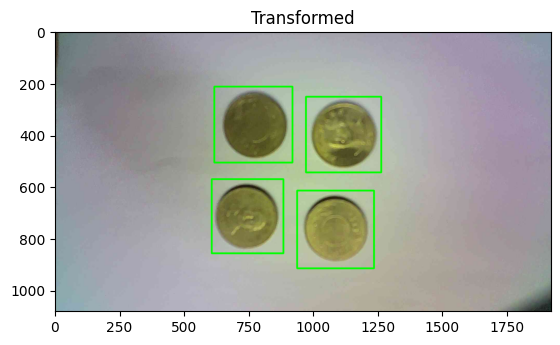

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = transformer(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hvFlipImg,hvFlipBoxes)

#### Rotation:

In [ ]:
rotate = createTechnique("rotate", {"angle" : 90})
augmentor.addTransformer(transformer(rotate))

Showing the result of applying the transformation.

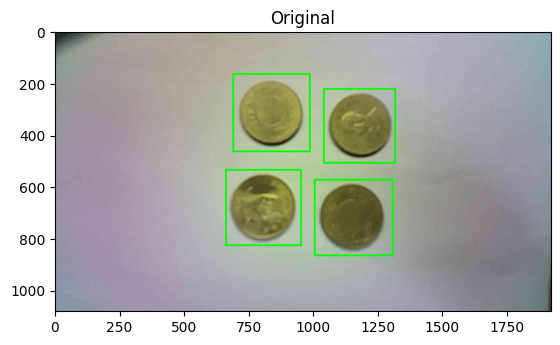

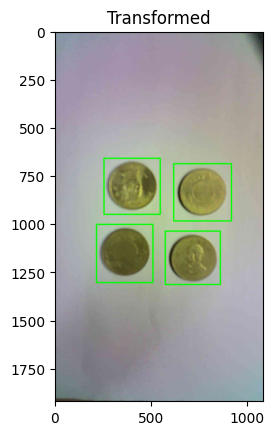

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

#### Average blurring

In [ ]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
augmentor.addTransformer(transformer(avgBlur))

Showing the result of applying the transformation.

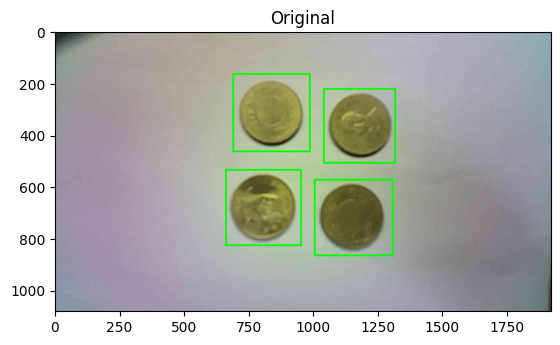

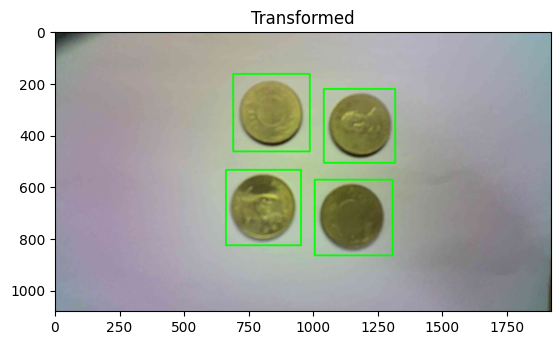

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = transformer(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(avgBlurImg,avgBlurBoxes)

#### Raise Hue

In [ ]:
hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addTransformer(transformer(hue))

Showing the result of applying the transformation.

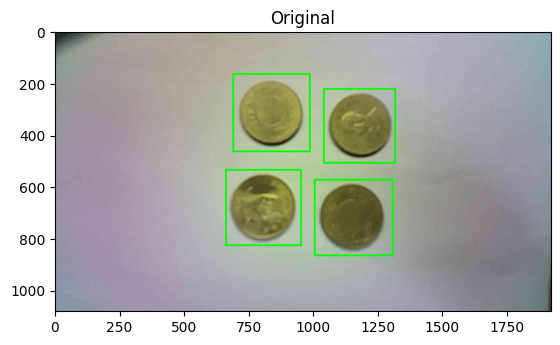

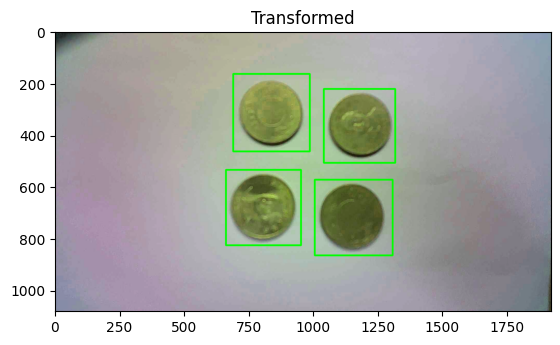

In [ ]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hue)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hueImg,hueBoxes)

#### None
(to keep also the original image)

In [ ]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [ ]:
augmentor.applyAugmentation()

Finally, we can check the amount of images in the output folder.

In [ ]:
print("Number of images in the folder")
!ls -1 JPEGImages/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 JPEGImages/*.txt | wc -l

Number of images in the folder
140
Number of annotations in the folder
140


創新資料夾以及移動.txt檔案至labels

In [ ]:
!mkdir labels
!mv JPEGImages/*.txt labels/

區分出
- 訓練集
- 驗證集
- 測試集

In [ ]:
%cd /content/gdrive/MyDrive/data
%ls

/content/gdrive/MyDrive/data
JPEGImages/  labels/  RAWdata/


In [ ]:
import os
import random
 
trainval_percent = 0.1
train_percent = 0.9
txtfilepath = 'labels'
imgfilepath = './JPEGImages/'
total_txt = os.listdir(txtfilepath)
 
num = len(total_txt)
list = range(num)
tv = int(num * trainval_percent)
tr = int(tv * train_percent)
trainval = random.sample(list, tv)
train = random.sample(trainval, tr)
 
ftrainval = open('trainval.txt', 'w')
ftest = open('test.txt', 'w')
ftrain = open('train.txt', 'w')
fval = open('val.txt', 'w')
 
for i in list:
    name = imgfilepath + total_txt[i][:-4] + '.jpg\n'
    if i in trainval:
        ftrainval.write(name)
        if i in train:
            ftest.write(name)
        else:
            fval.write(name)
    else:
        ftrain.write(name)


ftrainval.close()
ftrain.close()
fval.close()
ftest.close()

In [ ]:
cat train.txt val.txt  > all_train.txt

In [ ]:
%cd /content/gdrive/MyDrive/data
%ls

/content/gdrive/MyDrive/data
all_train.txt  labels/   test.txt   trainval.txt
JPEGImages/    RAWdata/  train.txt  val.txt
